In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
# Look at the datetime module which helps to  manipulate date and time
from datetime import date
from datetime import datetime

dt=date(2008, 8, 18)

dtday = dt.strftime('%d')
dtmonth = dt.strftime('%m')
dtyear = dt.strftime('%y')
print(dtmonth, dtday, dtyear)
print(type(dtmonth), type(int(dtmonth)))


08 18 08
<class 'str'> <class 'int'>


In [4]:
#importing data
df=pd.read_csv('weather_data.csv',header=0)
df.head(3)

,,,,,,,,,,,,,,,,datetime;T_mu;Po_mu;P_mu;Ff_mu;Tn_mu;Tx_mu;VV_mu;Td_mu;T_var;Po_var;P_var;Ff_var;Tn_var;Tx_var;VV_var;Td_var
2015-09-03;13,7375;759,3625;759,6750000000001;3,125;12,75;14,8;14,775;12,749999999999998;2,1055357142857143;0,1226785714285851;0,12785714285711605;1,5535714285714286;2,205000000000003;0,31999999999999845;115,73357142857142;1,85714285714282
2015-09-04;14,825;758,175;758,5124999999999;2,25;12,7;17,049999999999997;18,125;12,825;7,345000000000004;1,7821428571428892;1,7555357142856711;1,357142857142857;13,52000000000001;3,6450000000000027;68,12500000000001;2,165000000000001
2015-09-05;14,275;752,7375;753,0625;2,75;13,0;16,25;21,35;11,7625;1,7107142857142856;1,051249999999863;1,099821428571344;0,7857142857142858;2,0;0,125;77,03714285714285;1,434107142857144


In [5]:
#importing the data properly by using required parameters

data = pd.read_csv('weather_data.csv',parse_dates=['datetime'], sep=';', decimal=',', infer_datetime_format=True)
data.head()



,datetime,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
0,2015-09-03,13.7375,759.3625,759.6750,3.125000,12.75,14.80,14.775,12.7500,2.105536,0.122679,0.127857,1.553571,2.205,0.320,115.733571,1.008571
1,2015-09-04,14.8250,758.1750,758.5125,2.250000,12.70,17.05,18.125,12.8250,7.345000,1.782143,1.755536,1.357143,13.520,3.645,68.125000,2.165000
2,2015-09-05,14.2750,752.7375,753.0625,2.750000,13.00,16.25,21.350,11.7625,1.710714,1.051250,1.099821,0.785714,2.000,0.125,77.037143,1.434107
3,2015-09-06,13.1250,753.1750,753.5125,1.857143,11.25,15.30,20.875,11.6625,5.679286,0.250714,0.252679,0.809524,3.125,3.920,53.839286,1.474107
4,2015-09-07,12.0875,753.8500,754.1875,3.750000,11.15,13.85,19.125,11.2125,0.678393,0.202857,0.206964,4.500000,0.845,0.405,64.410714,0.541250


## Data Dictionary

- The data are average daily temperatures collected by the weather station 2978 in Helsinki from September 2015 to May 2019. Our main here is T_mu which we need to predict . “T_mu” is showing the average daily air temperature, in degrees Celsius, 2 meters above the earth surface.

In [6]:
data.shape

(1346, 17)

In [7]:
#Selecting the date and T_mu columns

data=data[['datetime','T_mu']]
data.head()

,datetime,T_mu
0,2015-09-03,13.7375
1,2015-09-04,14.8250
2,2015-09-05,14.2750
3,2015-09-06,13.1250
4,2015-09-07,12.0875


In [8]:
print('Time period start: {}\nTime period end: {}'.format(data.datetime.min(),data.datetime.max()))

Time period start: 2015-09-03 00:00:00
Time period end: 2019-05-21 00:00:00


In [9]:
# Reset the index 
data.set_index("datetime", inplace=True)
data.head()

,T_mu
datetime,
2015-09-03,13.7375
2015-09-04,14.8250
2015-09-05,14.2750
2015-09-06,13.1250
2015-09-07,12.0875


In [10]:
data.describe()

,T_mu
count,1346.000000
mean,6.367627
std,8.180675
min,-22.675000
25%,0.768750
50%,5.535417
75%,13.424554
max,26.145833


# Data Visualizations

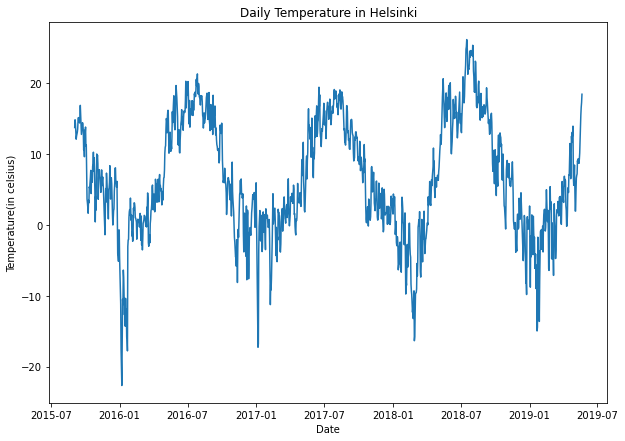

In [11]:
plt.figure(figsize=(10,7))
plt.plot(data)
plt.gca().set(title='Daily Temperature in Helsinki',xlabel='Date',ylabel='Temperature(in celsius)');

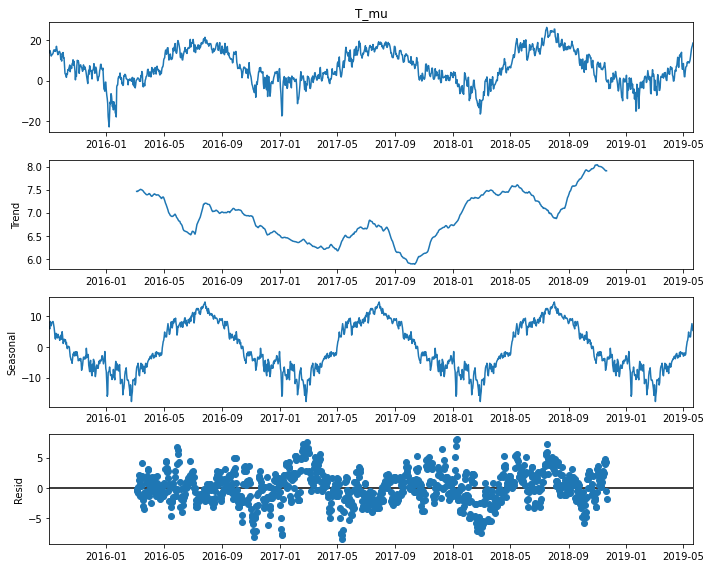

In [12]:
# Decomposing the data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data.T_mu,model='additive',period=365)
fig = decomposition.plot()

### Checking the stationarity of the data

#### - Using ACF and PACF plots

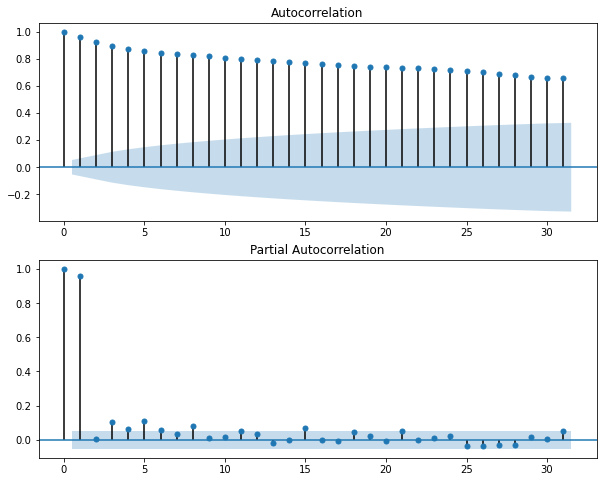

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(data.T_mu,ax=plt.gca(),lags=31)
plt.subplot(212)
plot_pacf(data.T_mu,ax=plt.gca(),lags=31)
plt.show()

#### - Using Augmented Dickey-Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller
# The test wil have to set up a regression equation and find the roots of that characteristic equation
# to find this equation it has to decide the number of lags which is done with the AIC information
#  left of the critical value is the rejection region for H0 and right of the critical value is the acceptance region

test=adfuller(data,autolag='AIC')
print('Test statistic: ' , test[0])
print('p value :',test[1])
print('Critical Values:' ,test[4])

# At 1% level of significance -3.03>-3.42   as it is to the right on the number line we fail 
# to reject H0 the series is not stationary

# At a 5% level of significance test statistic -3.03 < critical value -2.56 so  
# we reject H0, H1 is accepted i.e the series is stationary


Test statistic:  -3.0370330414016946
p value : 0.031577746006642426
Critical Values: {'1%': -3.435246778744666, '5%': -2.863702546181002, '10%': -2.5679213448446134}


#### - Rolling statistics

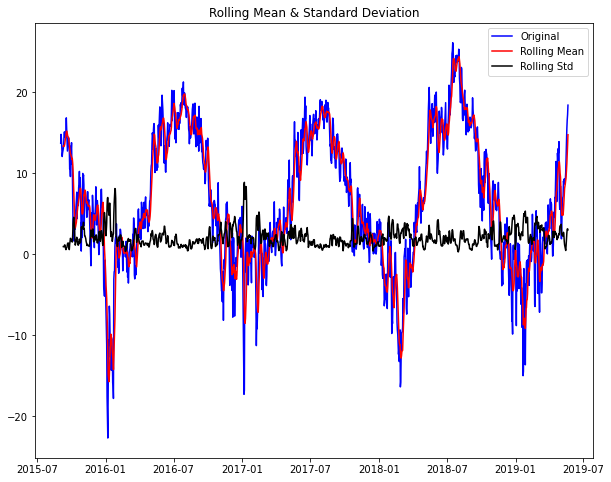

In [17]:
#Determing rolling statistics
rolmean = data.rolling(7).mean()
rolstd = data.rolling(7).std()

#Plot rolling statistics:
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- From all the three tests performed above we can say that our time series data is stationary 
- We have constant Mean and Variance, and our Test statistic is less than Critical Values, so we already have stationary Time series. So our 'd' value will become 0 in ARIMA Model.

## Building model using auto arima

https://alkaline-ml.com/pmdarima/tips_and_tricks.html

Parameters of auto_arima()
* The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA  model
* The Akaike Information Criterion (AIC) allows you to judge the goodness-of-fit of regression model while keeping in mind the possibility of over-fitting the data.
* The AIC is a model selection tool that strikes a balance between goodness-of-fit i.e. how well a model fits a data set, and how badly it over-fits it in its effort to fit the data set.
* While comparing models a lower AIC score is prefered
*A lower score indicates that the model has a superior capacity to balance goodness-of-fit with the risk of over-fitting the data set.

* AIC helps to identify optimal values of p,d,q


* if seasonal is true a seasonality test is done
* stepwise = True the algorithm will identify the optimal algorithm parameters stepwise instead of trying all values
* The parallel approach is a naive, brute force grid search over various combinations of hyper parameters
* trace = true will print some status on the fits
* error_action controls the error handli
optimal case is the intercept case, it decides on its own
* Explanation for ARIMA(2,0,2)(0,0,0)[0]  check this link
* generally statsmodels will throw a lot of warnings so better to suppress
* https://www.linkedin.com/pulse/reading-acf-pacf-plots-missing-manual-cheatsheet-saqib-ali


In [25]:
!pip install pmdarima

  Using cached pmdarima-1.8.2-cp37-cp37m-win_amd64.whl (591 kB)


In [26]:
#importing and building auto arima model
from pmdarima import auto_arima
model = auto_arima(data,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True,seasonal=True)



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5936.312, Time=2.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9480.760, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5978.054, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8080.932, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10116.688, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5961.328, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5979.427, Time=1.00 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5945.634, Time=2.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5938.311, Time=1.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5980.034, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5953.875, Time=0.73 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5936.373, Time=1.95 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=5939.870, Time=2.68 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5938.337, Time=1.24 sec

Best model:  ARIMA(2,0,2)(0,0,0

In [28]:
#   ARIMA(2,0,2)(0,0,0)[0] p(AR)=2 d=0 q(MA)=2 and without seasonality
#dividing the data into train and test and fitting the model
train = data[:int(0.70*(len(data)))]
valid = data[int(0.70*(len(data))):]
model.fit(train)

print (valid.shape)

(404, 1)


In [29]:
#forecasting on validation dataset
forecast=model.predict(len(valid))

In [31]:
forecast_df = pd.DataFrame(forecast,index=valid.index,columns=['prediction'])
forecast_df.head()

,prediction
datetime,
2018-04-09,3.531766
2018-04-10,3.131274
2018-04-11,2.856912
2018-04-12,2.672150
2018-04-13,2.551014


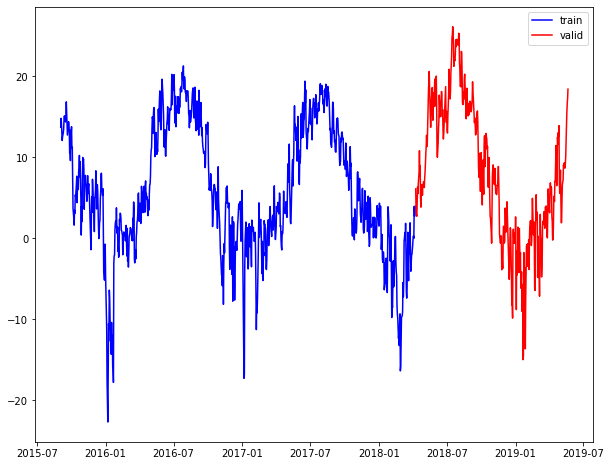

In [32]:
#Plot the train and test data sets
tr = plt.plot(train, color='blue',label='train')
vl = plt.plot(valid, color='red',label='valid')
plt.legend(loc='best')
plt.show()


In [33]:
pd.concat([valid,forecast_df],axis=1)

,T_mu,prediction
datetime,,
2018-04-09,6.112500,3.531766
2018-04-10,3.337500,3.131274
2018-04-11,2.900000,2.856912
2018-04-12,2.737500,2.672150
2018-04-13,4.437500,2.551014
...,...,...
2019-05-17,13.783333,5.931897
2019-05-18,15.508333,5.932788
2019-05-19,16.595833,5.933671


In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(valid, forecast)
print('RMSE :', np.sqrt(mse))

RMSE : 9.512269115917823


## Building model using ARIMA

## Building model using ARIMA
* A Typical process of fitting an ARIMA model includes

* Plotting data to see if any trend, seasonality or cyclicity is present or not.
* Decompose the data to find the Trend, Seasonality, Cyclicity, and Irregularity component 
* Check for stationarity by using methods such as the Augmented Dickey-Fuller (ADF) Test or by using ACF and PACF plots to know the order of differencing needed.
* If stationarity is not found use transformations.
* If stationarity is not achieved then find the order of differencing by using ACF and PACF plots and execute differencing to make the data stationary
* Use ACF and PACF plots to find the order of AR and MA
* Fit ARIMA model
* Evaluate model

* Underatand that the arima model is a regression model so it will use some optimization to fit the best fit curve


In [39]:
from statsmodels.tsa.arima_model import ARIMA

# Using the p,d,q parameters identified by ACF, PACF plots and run the ARIMA directly
# Here we are using the p,d,q values identified from auto_arima

#fitting the model
model = ARIMA(train.values, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

#forecasting on validation data
output = model_fit.forecast(len(valid))
pred=output[0]

#RMSE Score
print('RMSE :', np.sqrt(mean_squared_error(valid, pred)))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  942
Model:                     ARMA(2, 2)   Log Likelihood               -2046.288
Method:                       css-mle   S.D. of innovations              2.121
Date:                Sat, 26 Jun 2021   AIC                           4104.576
Time:                        08:41:50   BIC                           4133.664
Sample:                             0   HQIC                          4115.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0289      3.164      1.906      0.057      -0.172      12.229
ar.L1.y        1.7018      0.059     28.980      0.000       1.587       1.817
ar.L2.y       -0.7045      0.058    -12.187      0.0

* From the summary the important part is the value of the coefficients and whether or not they are significant
* we see the AR coefficients 1 and 2,  and the MA coefficients 1 and 2
* the positive sign indicates that there is positive correlation and negative sign indicates there is negative correlation
* The P >|z| tells us how significant these coefficients are we want P<0.05 for significance
* all AR and MA coeffs have P<0.05 so we reatin them we can drop the const if we like
* so our final model for prediction will be
* Y(t) = 1.7018* Y(t-1) - 0.7045*Y(t-2) -0.7581 * E(t-1) - 1.1061 * E(t-2)
* This is used to make predictions on the validation data


## Building model using SARIMA

In [42]:
import warnings
warnings.filterwarnings("ignore")

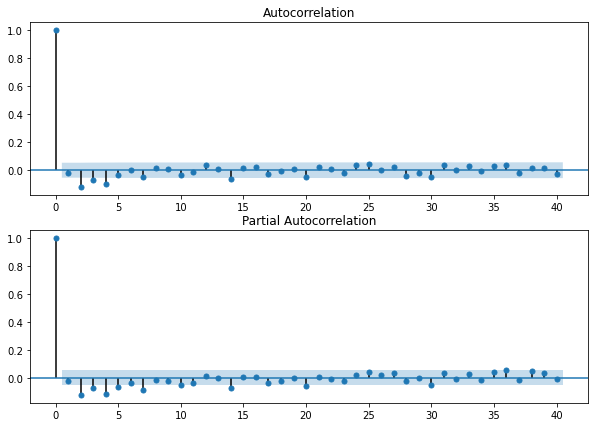

In [43]:
data_N=data.T_mu.diff()[1:]

plt.figure(figsize=(10,7))
#plt.figure()
plt.subplot(211)
plot_acf(data_N , ax=plt.gca(),lags=40, alpha=0.05)   #equivalent to plot(lags, corr)
plt.subplot(212)
plot_pacf(data_N ,ax=plt.gca(),lags=40, alpha=0.05)
plt.show()


In [47]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 1, 1, 31),enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False)
print (model_fit.summary())
pred = model_fit.forecast(len(valid))

#RMSE Score
print('RMSE :', np.sqrt(mean_squared_error(valid, pred)))

                                     SARIMAX Results                                      
Dep. Variable:                               T_mu   No. Observations:                  942
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 31)   Log Likelihood               -1969.137
Date:                            Sat, 26 Jun 2021   AIC                           3946.273
Time:                                    08:54:10   BIC                           3965.384
Sample:                                         0   HQIC                          3953.582
                                            - 942                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9610      0.008    126.017      0.000       0.946       0.976
ma.L1          0.0311      0.026   

https://www.linkedin.com/pulse/reading-acf-pacf-plots-missing-manual-cheatsheet-saqib-ali

* Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations.
* The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation.
* A zero indicates no correlation. The Pearson coefficient is a mathematical correlation coefficient representing the relationship between two variables,


## Notes 
* By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the original series, you can tentatively identify the numbers of AR and/or MA terms that are needed.
* The autocorrelations are significant for a large number of lags--but perhaps the autocorrelations at lags 2 and above are merely due to the propagation of the autocorrelation at lag 1.
* The PACF of the series is telling us that, if we don't difference it, then we should fit an AR(1) model
* if we stationarize by differencing, we need to correct any autocorrelation that remains in the differenced series.
* Here we observe that the  PACF correlations become negative so the series in overdifferenced. thus differencing is not needed her
* In principle, any autocorrelation pattern can be removed from a stationarized series by adding enough autoregressive terms (lags of the stationarized series) to the forecasting equation, and the PACF tells you how many such terms are likely be needed.
* However, this is not always the simplest way to explain a given pattern of autocorrelation: sometimes it is more efficient to add MA terms (lags of the forecast errors) instead. The autocorrelation function (ACF) plays the same role for MA terms that the PACF plays for AR terms
* ACF tells you how many MA terms are likely to be needed
* If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms.(consider 2 or 4)
* so we can consider ARIMA(1,0,2) or ARIMA (2,0,2) variations have to be tried


https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8
https://statisticsbyjim.com/time-series/moving-averages-smoothing/
https://www.datavedas.com/smoothing-techniques-and-time-series-decomposition/

https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-

https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711

https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/

good ones

https://online.stat.psu.edu/stat510/lesson/1/1.1
https://otexts.com/fpp2/stationarity.html

https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

https://www.linkedin.com/pulse/reading-acf-pacf-plots-missing-manual-cheatsheet-saqib-ali

https://www.datavedas.com/arima-family/

https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/

https://timeseriesreasoning.com/contents/partial-auto-correlation/#:
